In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3


In [ ]:
# #run name: PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/peak_analysis/bert2bert/data/global_align_heavy_seq_input_PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1.csv"

# path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt"

# df = pd.read_csv(path_csv)

In [ ]:
# # run name: full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_60_lr_0.001_wd_0.1
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/extracted_data_alignment_heavy2light_60_epochs_beam_search_127845.csv"
# path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/train_test_val_datasets/heavy_sep_light_seq/paired_full_seqs_sep_train_no_ids.txt"

# df = pd.read_csv(path_csv)

In [2]:
# bert2gpt
# run name: full_PLAbDab_healthy_human_nucleus_bert2gpt_nucleus_healthy_human_PLAbDab_max_new_tokens_115_num_epochs_50_bert_like_tokenizer_unpaired_epo_41-7  
path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/global_align_full_PLAbDab_healthy_human_nucleus_bert2gpt_nucleus_healthy_human_PLAbDab_max_new_tokens_115_num_epochs_50_bert_like_tokenizer_unpaired_epo_41.csv"

path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt"

df = pd.read_csv(path_csv)

In [4]:
# remove duplicates in generated_sequence_light
df_unique = df.drop_duplicates(subset=['generated_sequence_light'], keep='first')

In [ ]:
# # bert2gpt
# # run name: full_PLAbDab_oas_paired_abngs_diverse_beam_search_bert2gpt_diverse_beam_search_oas_paired_abngs_PLAbDab_max_new_tokens_115_num_epochs_50_bert_like_tokenizer_unpaired_epo_80  
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/extracted_data_oas_pairedabngs_full_eval_bert2gpt_mask_token_avoid_201537.csv"

# path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_abngs_db/train_val_test_oas_and_pairedabngs/combined_train_dataset_oas_pairedabngs_no_dupl.txt"


# df = pd.read_csv(path_csv)

In [ ]:
# # bert2bert
# # run name: nucleus_0.9_temp_0.1_full_PLAbDab_healthy_human_max_length_120_num_epochs_30  
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/extracted_data_full_eval_nucleus_0.9_temp_0.1_full_PLAbDab_healthy_human_184933.csv"

# path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt"


# df = pd.read_csv(path_csv)

In [ ]:
# # bert2gpt
# # run name: big_encoder_healthy_human_PLAbDab_full_bert2gpt_diverse_beam_search_healthy_human_num_epochs_50_lr_1e-06_unpaired_epo_80
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/extracted_data_big_encoder_full_eval_bert2gpt_epoch_80_human_healthy_no_vac_plabdab_201931.csv"

# path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt"


# df = pd.read_csv(path_csv)

In [5]:

# Read the TXT file and extract light chain sequences
light_chain_sequences = []
with open(path_txt, 'r') as f:
    for line in f:
        line = line.strip()
        if '[SEP]' in line:
            # Extract the light chain part (after [SEP])
            light_chain = line.split('[SEP]')[1]
            light_chain_sequences.append(light_chain)

# Count how many sequences match
alignment_matches = 0
generated_matches = 0

for _, row in df_unique.iterrows():
    alignment_seq = row['sequence_alignment_aa_light']
    generated_seq = row['generated_sequence_light']
    
    if alignment_seq in light_chain_sequences:
        alignment_matches += 1
    
    if generated_seq in light_chain_sequences:
        generated_matches += 1

# Calculate percentages
total_sequences = len(df_unique)
alignment_percentage = (alignment_matches / total_sequences) * 100
generated_percentage = (generated_matches / total_sequences) * 100

# Print results
print(f"Total sequences in CSV: {total_sequences}")
print(f"Alignment matches: {alignment_matches} ({alignment_percentage:.2f}%)")
print(f"Generated matches: {generated_matches} ({generated_percentage:.2f}%)")

Total sequences in CSV: 19649
Alignment matches: 3723 (18.95%)
Generated matches: 2575 (13.10%)


In [36]:
# count unique occurences in generated_sequence_light
unique_generated_sequences = df['generated_sequence_light'].nunique()
print(f"Unique generated sequences: {unique_generated_sequences}")

Unique generated sequences: 2766


In [ ]:
#path_test_set = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/train_test_val_datasets/heavy_sep_light_seq/paired_full_seqs_sep_test_no_ids.txt"

path_test_set = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_test_no_identifiers.txt"

#path_test_set = "/ibmm_data2/oas_database/paired_lea_tmp/paired_abngs_db/train_val_test_oas_and_pairedabngs/combined_test_dataset_oas_pairedabngs_no_dupl.txt"


In [ ]:
#df = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/peak_analysis/bert2bert/data/global_align_heavy_seq_input_PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1.csv')

# Read the TXT file and extract light chain sequences
light_chain_sequences = []
with open(path_test_set, 'r') as f:
    for line in f:
        line = line.strip()
        if '[SEP]' in line:
            # Extract the light chain part (after [SEP])
            light_chain = line.split('[SEP]')[1]
            light_chain_sequences.append(light_chain)

# Count how many sequences match
alignment_matches = 0
generated_matches = 0

for _, row in df.iterrows():
    alignment_seq = row['sequence_alignment_aa_light']
    generated_seq = row['generated_sequence_light']
    
    if alignment_seq in light_chain_sequences:
        alignment_matches += 1
    
    if generated_seq in light_chain_sequences:
        generated_matches += 1

# Calculate percentages
total_sequences = len(df)
alignment_percentage = (alignment_matches / total_sequences) * 100
generated_percentage = (generated_matches / total_sequences) * 100

# Print results
print(f"Total sequences in CSV: {total_sequences}")
print(f"Alignment matches: {alignment_matches} ({alignment_percentage:.2f}%)")
print(f"Generated matches: {generated_matches} ({generated_percentage:.2f}%)")

Total sequences in CSV: 58839
Alignment matches: 58839 (100.00%)
Generated matches: 16400 (27.87%)


In [ ]:
# path_csv = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/peak_analysis/bert2bert/data/global_align_heavy_seq_input_PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1.csv"

#path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt"

#path_txt = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/test_data_pairings_random_fake_sequences.txt"


In [ ]:
import pandas as pd
from collections import defaultdict
import os

# Create output directory if it doesn't exist
output_dir = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files"
#file_save_prefix = "fake_test_set_to_check_code"
#file_save_prefix = "sorted_plabdab_human_healthy_no_vac_allocated_train"
file_save_prefix = "100cdr3_70full_50full_clustering_train_set_sorted"
os.makedirs(output_dir, exist_ok=True)

heavy_file_name = f"{file_save_prefix}_heavy_chains_analysis.txt"
light_file_name = f"{file_save_prefix}_light_chains_analysis.txt"
summary_file_name = f"{file_save_prefix}_summary_statistics.txt"

# Load the txt file which contains your heavy and light sequence pairs
heavy_to_light = defaultdict(set)
light_to_heavy = defaultdict(set)

line_count = 0
# Read the file and populate our dictionaries
with open(path_txt, 'r') as f:
    for line in f:
        line = line.strip()
        if '[SEP]' in line:
            parts = line.split('[SEP]')
            heavy_seq = parts[0]
            light_seq = parts[1]
            
            # Add this pair to our dictionaries
            heavy_to_light[heavy_seq].add(light_seq)
            light_to_heavy[light_seq].add(heavy_seq)


# Convert dictionaries to sortable lists of tuples (sequence, partners, partner_count)
heavy_data = [(heavy_seq, light_seqs, len(light_seqs)) for heavy_seq, light_seqs in heavy_to_light.items()]
light_data = [(light_seq, heavy_seqs, len(heavy_seqs)) for light_seq, heavy_seqs in light_to_heavy.items()]

# Sort by number of partners (descending)
heavy_data.sort(key=lambda x: x[2], reverse=True)
light_data.sort(key=lambda x: x[2], reverse=True)



# Open files for writing results
with open(os.path.join(output_dir, heavy_file_name), "w") as heavy_file, \
     open(os.path.join(output_dir, light_file_name), "w") as light_file, \
     open(os.path.join(output_dir, summary_file_name), "w") as summary_file:
    
    # Write headers
    heavy_file.write("Heavy Chain Sequence\tNumber of Light Partners\tLight Chain Partners\n")
    light_file.write("Light Chain Sequence\tNumber of Heavy Partners\tHeavy Chain Partners\n")
    
        # Write sorted heavy chain information
    heavy_with_multiple_lights = 0
    for heavy_seq, light_seqs, partner_count in heavy_data:
        if partner_count > 1:
            heavy_with_multiple_lights += 1
        
        # Write to file
        heavy_file.write(f"{heavy_seq}\t{partner_count}\t")
        heavy_file.write("|".join(light_seqs))
        heavy_file.write("\n")
    
    # Write sorted light chain information
    light_with_multiple_heavies = 0
    for light_seq, heavy_seqs, partner_count in light_data:
        if partner_count > 1:
            light_with_multiple_heavies += 1
            
        # Write to file
        light_file.write(f"{light_seq}\t{partner_count}\t")
        light_file.write("|".join(heavy_seqs))
        light_file.write("\n")
    
    # Calculate percentages
    total_heavy_seqs = len(heavy_to_light)
    total_light_seqs = len(light_to_heavy)
    total_pairs = sum(len(lights) for lights in heavy_to_light.values())
    
    # Write summary statistics
    summary_file.write(f"Total rows in file: {line_count}\n")
    summary_file.write(f"Total heavy-light pairs: {total_pairs}\n")
    summary_file.write(f"Total unique heavy sequences: {total_heavy_seqs}\n")
    summary_file.write(f"Total unique light sequences: {total_light_seqs}\n\n")
    
    summary_file.write(f"Heavy sequences with multiple light pairs: {heavy_with_multiple_lights} ({heavy_with_multiple_lights/total_heavy_seqs*100:.2f}%)\n")
    summary_file.write(f"Light sequences with multiple heavy pairs: {light_with_multiple_heavies} ({light_with_multiple_heavies/total_light_seqs*100:.2f}%)\n")
    
    # Add distribution information
    summary_file.write("\nDistribution of light partners per heavy chain:\n")
    partner_counts = {}
    for _, _, count in heavy_data:
        partner_counts[count] = partner_counts.get(count, 0) + 1
    
    for count in sorted(partner_counts.keys()):
        summary_file.write(f"  {count} partner(s): {partner_counts[count]} heavy chains ({partner_counts[count]/total_heavy_seqs*100:.2f}%)\n")
    
    summary_file.write("\nDistribution of heavy partners per light chain:\n")
    partner_counts = {}
    for _, _, count in light_data:
        partner_counts[count] = partner_counts.get(count, 0) + 1
    
    for count in sorted(partner_counts.keys()):
        summary_file.write(f"  {count} partner(s): {partner_counts[count]} light chains ({partner_counts[count]/total_light_seqs*100:.2f}%)\n")


print(f"Analysis complete. Results saved to '{output_dir}' directory.")
print(f"- Heavy chain analysis: {os.path.join(output_dir, heavy_file_name)}")
print(f"- Light chain analysis: {os.path.join(output_dir, light_file_name)}")
print(f"- Summary statistics: {os.path.join(output_dir, summary_file_name)}")

Analysis complete. Results saved to '/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files' directory.
- Heavy chain analysis: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/sorted_plabdab_human_healthy_no_vac_allocated_train_heavy_chains_analysis.txt
- Light chain analysis: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/sorted_plabdab_human_healthy_no_vac_allocated_train_light_chains_analysis.txt
- Summary statistics: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/sorted_plabdab_human_healthy_no_vac_allocated_train_summary_statistics.txt


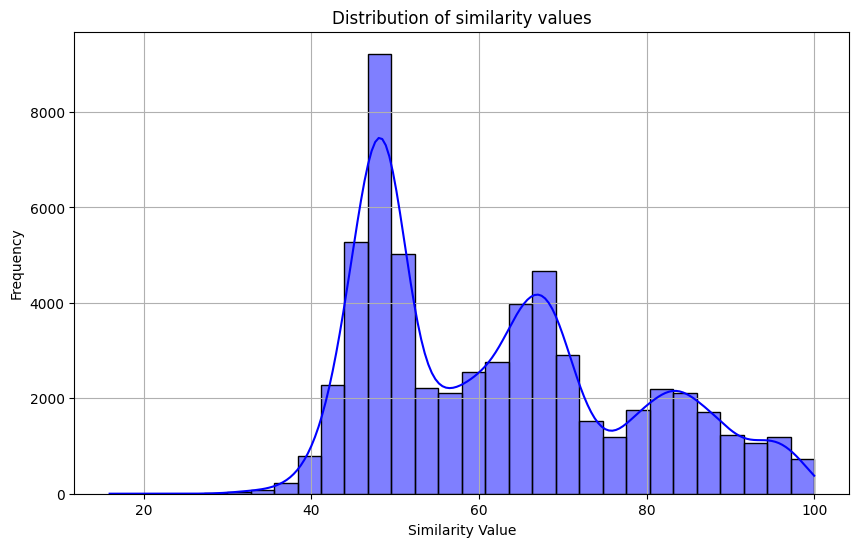

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='similarity', bins=30, kde=True, color='blue')
plt.title('Distribution of similarity values')
plt.xlabel('Similarity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [17]:
# create 3 groups, based on the calcualted similarity value
def categorize_similarity(value):
    if value < 55:
        return 'Low'
    elif 55 <= value < 78: #vorher: 78
        return 'Medium'
    else:
        return 'High'

df['similarity_category'] = df['similarity'].apply(categorize_similarity)

In [18]:
# check how many generated sequences are overlapping in each group low medium and high
low_group = df[df['similarity_category'] == 'Low']
low_group_count = low_group['generated_sequence_light'].nunique()
medium_group = df[df['similarity_category'] == 'Medium']
medium_group_count = medium_group['generated_sequence_light'].nunique()
high_group = df[df['similarity_category'] == 'High']
high_group_count = high_group['generated_sequence_light'].nunique()
print(f"Low group unique generated sequences: {low_group_count}")
print(f"Medium group unique generated sequences: {medium_group_count}")
print(f"High group unique generated sequences: {high_group_count}")


Low group unique generated sequences: 9554
Medium group unique generated sequences: 8809
High group unique generated sequences: 5466


Overlap Analysis Results:
Only Low: 6837
Only Medium: 6146
Only High: 3563
Low and Medium: 1200
Low and High: 440
Medium and High: 386
All Three Groups: 1077
Total Unique: 19649

Percentages:
Sequences in Low: 9554 (48.62% of total unique)
Sequences in Medium: 8809 (44.83% of total unique)
Sequences in High: 5466 (27.82% of total unique)
Sequences in all three groups: 1077 (5.48% of total unique)


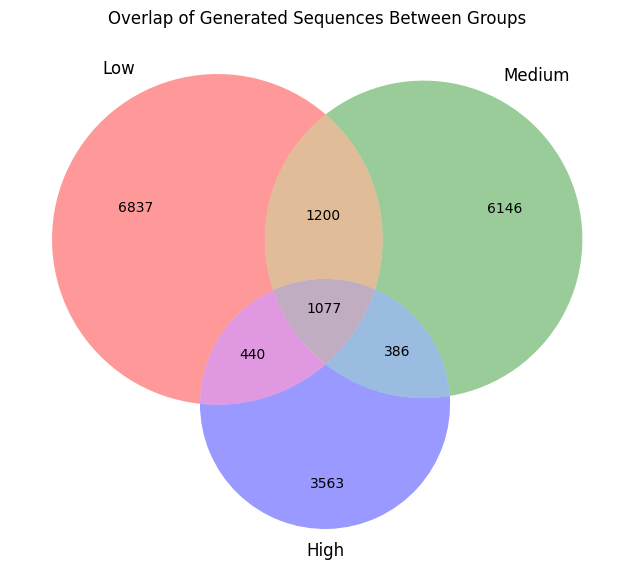

In [19]:


# Extract the generated sequences from each dataframe
low_sequences = set(low_group['generated_sequence_light'])
medium_sequences = set(medium_group['generated_sequence_light'])
high_sequences = set(high_group['generated_sequence_light'])

# Calculate overlaps
only_low = len(low_sequences - medium_sequences - high_sequences)
only_medium = len(medium_sequences - low_sequences - high_sequences)
only_high = len(high_sequences - low_sequences - medium_sequences)

low_medium = len((low_sequences & medium_sequences) - high_sequences)
low_high = len((low_sequences & high_sequences) - medium_sequences)
medium_high = len((medium_sequences & high_sequences) - low_sequences)

all_three = len(low_sequences & medium_sequences & high_sequences)

# Create a dictionary to store the results
overlap_results = {
    'Only Low': only_low,
    'Only Medium': only_medium,
    'Only High': only_high,
    'Low and Medium': low_medium,
    'Low and High': low_high,
    'Medium and High': medium_high,
    'All Three Groups': all_three,
    'Total Unique': len(low_sequences | medium_sequences | high_sequences)
}

# Print results
print("Overlap Analysis Results:")
for category, count in overlap_results.items():
    print(f"{category}: {count}")

# Calculate percentages
total_low = len(low_sequences)
total_medium = len(medium_sequences)
total_high = len(high_sequences)
total_unique = len(low_sequences | medium_sequences | high_sequences)

print("\nPercentages:")
print(f"Sequences in Low: {total_low} ({total_low/total_unique*100:.2f}% of total unique)")
print(f"Sequences in Medium: {total_medium} ({total_medium/total_unique*100:.2f}% of total unique)")
print(f"Sequences in High: {total_high} ({total_high/total_unique*100:.2f}% of total unique)")
print(f"Sequences in all three groups: {all_three} ({all_three/total_unique*100:.2f}% of total unique)")

# Create Venn diagram visualization
plt.figure(figsize=(10, 7))
venn3(
    [low_sequences, medium_sequences, high_sequences],
    ('Low', 'Medium', 'High')
)
plt.title('Overlap of Generated Sequences Between Groups')
#plt.savefig('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/big_encoder_healthy_human_PLAbDab_full_bert2gpt_diverse_beam_search_sequence_overlap_venn.png', dpi=300)
plt.show()

# Save results to CSV
overlap_df = pd.DataFrame([overlap_results])
#overlap_df.to_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/big_encoder_healthy_human_PLAbDab_full_bert2gpt_diverse_beam_search_sequence_overlap_analysis.csv', index=False)

In [26]:
# print mean similarity value for each group
mean_low = low_group['similarity'].mean()
mean_medium = medium_group['similarity'].mean() 
mean_high = high_group['similarity'].mean()
print(f"Mean similarity for Low group: {mean_low:.2f}")
print(f"Mean similarity for Medium group: {mean_medium:.2f}")
print(f"Mean similarity for High group: {mean_high:.2f}")



Mean similarity for Low group: 48.01
Mean similarity for Medium group: 66.30
Mean similarity for High group: 87.68


In [22]:
properties_to_analyze = ['similarity']  # Example properties

# Extract the generated sequences from each dataframe
low_sequences = set(low_group['generated_sequence_light'])
medium_sequences = set(medium_group['generated_sequence_light'])
high_sequences = set(high_group['generated_sequence_light'])

# Calculate overlaps
only_low_seq = low_sequences - medium_sequences - high_sequences
only_medium_seq = medium_sequences - low_sequences - high_sequences
only_high_seq = high_sequences - low_sequences - medium_sequences

low_medium_seq = (low_sequences & medium_sequences) - high_sequences
low_high_seq = (low_sequences & high_sequences) - medium_sequences
medium_high_seq = (medium_sequences & high_sequences) - low_sequences

all_three_seq = low_sequences & medium_sequences & high_sequences

# Function to calculate means for sequences in an overlap group
def calculate_group_means(sequences, properties):
    results = {}
    
    # For each group dataframe
    for name, df in [('Low', low_group), ('Medium', medium_group), ('High', high_group)]:
        # Filter to only include sequences in this overlap
        overlap_df = df[df['generated_sequence_light'].isin(sequences)]
        
        if not overlap_df.empty:
            # Calculate means for each property
            property_means = {prop: overlap_df[prop].mean() for prop in properties}
            results[name] = property_means
    
    return results

# Print the basic counts as before
overlap_results = {
    'Only Low': len(only_low_seq),
    'Only Medium': len(only_medium_seq),
    'Only High': len(only_high_seq),
    'Low and Medium': len(low_medium_seq),
    'Low and High': len(low_high_seq),
    'Medium and High': len(medium_high_seq),
    'All Three Groups': len(all_three_seq),
    'Total Unique': len(low_sequences | medium_sequences | high_sequences)
}

print("Overlap Analysis Results:")
for category, count in overlap_results.items():
    print(f"{category}: {count}")

# Calculate and print means for each main group
print("\nMean values for each main group:")
for name, df, prop in [
    ('Low', low_group, properties_to_analyze),
    ('Medium', medium_group, properties_to_analyze),
    ('High', high_group, properties_to_analyze)
]:
    print(f"{name} group:")
    for p in prop:
        print(f"  - {p}: {df[p].mean():.4f}")

# Calculate and print means for each overlap group
print("\nMean values for overlap groups:")

# Only Low
only_low_means = calculate_group_means(only_low_seq, properties_to_analyze)
print("\nOnly Low:")
for group, props in only_low_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# Only Medium
only_medium_means = calculate_group_means(only_medium_seq, properties_to_analyze)
print("\nOnly Medium:")
for group, props in only_medium_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# Only High
only_high_means = calculate_group_means(only_high_seq, properties_to_analyze)
print("\nOnly High:")
for group, props in only_high_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# Low and Medium
low_medium_means = calculate_group_means(low_medium_seq, properties_to_analyze)
print("\nLow and Medium:")
for group, props in low_medium_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# Low and High
low_high_means = calculate_group_means(low_high_seq, properties_to_analyze)
print("\nLow and High:")
for group, props in low_high_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# Medium and High
medium_high_means = calculate_group_means(medium_high_seq, properties_to_analyze)
print("\nMedium and High:")
for group, props in medium_high_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")

# All Three
all_three_means = calculate_group_means(all_three_seq, properties_to_analyze)
print("\nAll Three Groups:")
for group, props in all_three_means.items():
    print(f"  {group}:")
    for prop, value in props.items():
        print(f"    - {prop}: {value:.4f}")



Overlap Analysis Results:
Only Low: 6837
Only Medium: 6146
Only High: 3563
Low and Medium: 1200
Low and High: 440
Medium and High: 386
All Three Groups: 1077
Total Unique: 19649

Mean values for each main group:
Low group:
  - similarity: 47.7193
Medium group:
  - similarity: 65.8071
High group:
  - similarity: 87.1926

Mean values for overlap groups:

Only Low:
  Low:
    - similarity: 47.0635

Only Medium:
  Medium:
    - similarity: 65.9999

Only High:
  High:
    - similarity: 87.1699

Low and Medium:
  Low:
    - similarity: 47.8336
  Medium:
    - similarity: 64.2856

Low and High:
  Low:
    - similarity: 47.9258
  High:
    - similarity: 86.9169

Medium and High:
  Medium:
    - similarity: 67.3062
  High:
    - similarity: 87.8038

All Three Groups:
  Low:
    - similarity: 48.0479
  Medium:
    - similarity: 65.9072
  High:
    - similarity: 87.1734


Overlap Analysis Results:
Only Low: 6837
Only Medium: 6146
Only High: 3563
Low and Medium: 1200
Low and High: 440
Medium and High: 386
All Three Groups: 1077
Total Unique: 19649

Mean values for overlap groups:

Only Low:
  - similarity: 46.9934

Only Medium:
  - similarity: 66.0824

Only High:
  - similarity: 85.7880

Low and Medium:
  - similarity: 56.1559

Low and High:
  - similarity: 67.0882

Medium and High:
  - similarity: 76.3685

All Three Groups:
  - similarity: 66.7223

Comprehensive Means DataFrame:
            Overlap  Count  similarity_mean
0          Only Low   6837        46.993358
1       Only Medium   6146        66.082406
2         Only High   3563        85.787964
3    Low and Medium   1200        56.155908
4      Low and High    440        67.088153
5   Medium and High    386        76.368517
6  All Three Groups   1077        66.722312


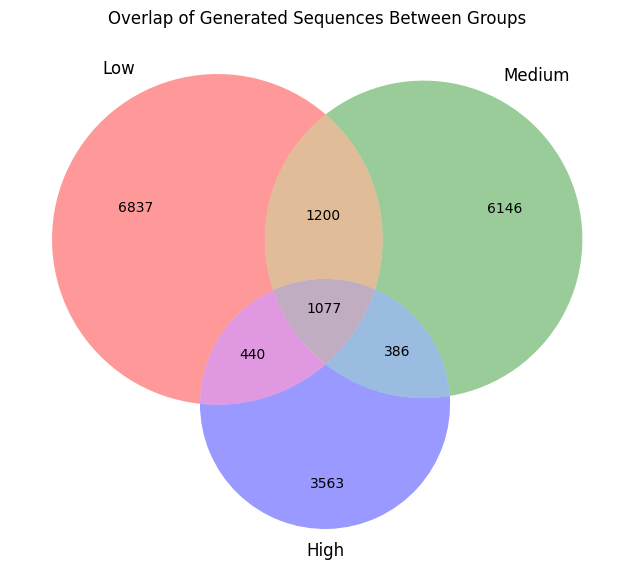

In [21]:
# Extract the generated sequences from each dataframe
low_sequences = set(low_group['generated_sequence_light'])
medium_sequences = set(medium_group['generated_sequence_light'])
high_sequences = set(high_group['generated_sequence_light'])

# Calculate overlaps
only_low_seq = low_sequences - medium_sequences - high_sequences
only_medium_seq = medium_sequences - low_sequences - high_sequences
only_high_seq = high_sequences - low_sequences - medium_sequences

low_medium_seq = (low_sequences & medium_sequences) - high_sequences
low_high_seq = (low_sequences & high_sequences) - medium_sequences
medium_high_seq = (medium_sequences & high_sequences) - low_sequences

all_three_seq = low_sequences & medium_sequences & high_sequences

# Function to calculate a single mean for each property across all sequences in an overlap group
def calculate_overlap_means(sequences, properties):
    # Create a list to collect all property values for sequences in the overlap group
    all_values = {prop: [] for prop in properties}
    
    # Gather values from all relevant dataframes
    for seq in sequences:
        # Check if sequence exists in low group and collect its values
        low_match = low_group[low_group['generated_sequence_light'] == seq]
        if not low_match.empty:
            for prop in properties:
                all_values[prop].append(low_match[prop].values[0])
        
        # Check if sequence exists in medium group and collect its values
        medium_match = medium_group[medium_group['generated_sequence_light'] == seq]
        if not medium_match.empty:
            for prop in properties:
                all_values[prop].append(medium_match[prop].values[0])
        
        # Check if sequence exists in high group and collect its values
        high_match = high_group[high_group['generated_sequence_light'] == seq]
        if not high_match.empty:
            for prop in properties:
                all_values[prop].append(high_match[prop].values[0])
    
    # Calculate the mean for each property across all collected values
    means = {prop: sum(values) / len(values) if values else float('nan') 
             for prop, values in all_values.items()}
    
    return means

# Properties to analyze
properties_to_analyze = ['similarity']  

# Print the basic counts
overlap_results = {
    'Only Low': len(only_low_seq),
    'Only Medium': len(only_medium_seq),
    'Only High': len(only_high_seq),
    'Low and Medium': len(low_medium_seq),
    'Low and High': len(low_high_seq),
    'Medium and High': len(medium_high_seq),
    'All Three Groups': len(all_three_seq),
    'Total Unique': len(low_sequences | medium_sequences | high_sequences)
}

print("Overlap Analysis Results:")
for category, count in overlap_results.items():
    print(f"{category}: {count}")

# Calculate and print means for each overlap group
print("\nMean values for overlap groups:")

# Only Low
only_low_means = calculate_overlap_means(only_low_seq, properties_to_analyze)
print("\nOnly Low:")
for prop, value in only_low_means.items():
    print(f"  - {prop}: {value:.4f}")

# Only Medium
only_medium_means = calculate_overlap_means(only_medium_seq, properties_to_analyze)
print("\nOnly Medium:")
for prop, value in only_medium_means.items():
    print(f"  - {prop}: {value:.4f}")

# Only High
only_high_means = calculate_overlap_means(only_high_seq, properties_to_analyze)
print("\nOnly High:")
for prop, value in only_high_means.items():
    print(f"  - {prop}: {value:.4f}")

# Low and Medium
low_medium_means = calculate_overlap_means(low_medium_seq, properties_to_analyze)
print("\nLow and Medium:")
for prop, value in low_medium_means.items():
    print(f"  - {prop}: {value:.4f}")

# Low and High
low_high_means = calculate_overlap_means(low_high_seq, properties_to_analyze)
print("\nLow and High:")
for prop, value in low_high_means.items():
    print(f"  - {prop}: {value:.4f}")

# Medium and High
medium_high_means = calculate_overlap_means(medium_high_seq, properties_to_analyze)
print("\nMedium and High:")
for prop, value in medium_high_means.items():
    print(f"  - {prop}: {value:.4f}")

# All Three
all_three_means = calculate_overlap_means(all_three_seq, properties_to_analyze)
print("\nAll Three Groups:")
for prop, value in all_three_means.items():
    print(f"  - {prop}: {value:.4f}")

# Create a comprehensive DataFrame for all overlaps and means
import pandas as pd

# Function to create a flat DataFrame of all means
def create_simple_means_dataframe(overlap_groups, properties):
    rows = []
    
    for overlap_name, sequences in overlap_groups.items():
        means = calculate_overlap_means(sequences, properties)
        
        row = {
            'Overlap': overlap_name,
            'Count': len(sequences)
        }
        # Add all property means to the row
        for prop, value in means.items():
            row[f'{prop}_mean'] = value
        
        rows.append(row)
    
    return pd.DataFrame(rows)

# Create dictionary of all overlap groups
all_overlaps = {
    'Only Low': only_low_seq,
    'Only Medium': only_medium_seq,
    'Only High': only_high_seq,
    'Low and Medium': low_medium_seq,
    'Low and High': low_high_seq,
    'Medium and High': medium_high_seq,
    'All Three Groups': all_three_seq
}

# Create and display comprehensive DataFrame
means_df = create_simple_means_dataframe(all_overlaps, properties_to_analyze)
print("\nComprehensive Means DataFrame:")
print(means_df)

# Save to CSV if needed
# means_df.to_csv('sequence_overlap_means_analysis.csv', index=False)

# Continue with your Venn diagram code
plt.figure(figsize=(10, 7))
venn3(
    [low_sequences, medium_sequences, high_sequences],
    ('Low', 'Medium', 'High')
)
plt.title('Overlap of Generated Sequences Between Groups')
plt.show()

### Check if a generated sequence is overrepresented 

In [ ]:


import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import argparse
import sys

def analyze_sequences(csv_filename, output_log='sequence_analysis_log.txt'):
    """
    Analyze sequences in the generated_sequence_light column
    
    Args:
        csv_filename (str): Path to the CSV file
        output_log (str): Path for the output log file
    
    Returns:
        dict: Summary statistics
    """
    try:
        print(f"Reading CSV file: {csv_filename}")
        
        # Read CSV file
        df = pd.read_csv(csv_filename)
        
        # Check if required column exists
        if 'generated_sequence_light' not in df.columns:
            raise ValueError("Column 'generated_sequence_light' not found in CSV file")
        
        print(f"Successfully loaded {len(df)} rows")
        
        # Extract and clean sequences
        sequences = df['generated_sequence_light'].dropna().astype(str)
        sequences = sequences[sequences != '']  # Remove empty strings
        sequences = sequences.str.strip()  # Remove whitespace
        
        print(f"Found {len(sequences)} valid sequences")
        
        # Count occurrences of each sequence
        sequence_counts = Counter(sequences)
        
        # Calculate statistics
        total_sequences = len(sequences)
        unique_sequences = len(sequence_counts)
        duplicate_rate = ((total_sequences - unique_sequences) / total_sequences * 100)
        
        # Sort sequences by count (descending)
        sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Calculate percentages
        sequence_data = []
        for sequence, count in sorted_sequences:
            percentage = (count / total_sequences) * 100
            sequence_data.append({
                'sequence': sequence,
                'count': count,
                'percentage': percentage
            })
        
        # Identify overrepresented sequences
        expected_frequency = 1 / unique_sequences
        overrepresented_threshold = expected_frequency * 2  
        
        overrepresented = [
            item for item in sequence_data 
            if (item['count'] / total_sequences) > overrepresented_threshold
        ]
        
        # Calculate distribution statistics
        counts = [item['count'] for item in sequence_data]
        mean_freq = np.mean(counts)
        median_freq = np.median(counts)
        std_freq = np.std(counts)
        min_freq = min(counts)
        max_freq = max(counts)
        
        # Create frequency distribution
        freq_distribution = Counter(counts)
        
        # Generate log content
        log_content = generate_log_content(
            csv_filename, total_sequences, unique_sequences, duplicate_rate,
            sequence_data, overrepresented, overrepresented_threshold,
            mean_freq, median_freq, std_freq, min_freq, max_freq,
            freq_distribution
        )
        
        # Write log file
        print(f"Writing analysis log to: {output_log}")
        with open(output_log, 'w', encoding='utf-8') as f:
            f.write(log_content)
        
        # Summary for return
        summary = {
            'total_sequences': total_sequences,
            'unique_sequences': unique_sequences,
            'duplicate_rate': duplicate_rate,
            'overrepresented_count': len(overrepresented),
            'top_sequence': {
                'sequence': sequence_data[0]['sequence'],
                'count': sequence_data[0]['count'],
                'percentage': sequence_data[0]['percentage']
            },
            'log_file': output_log
        }
        
        print("\n=== ANALYSIS COMPLETE ===")
        print(f"Total sequences: {total_sequences}")
        print(f"Unique sequences: {unique_sequences}")
        print(f"Duplicate rate: {duplicate_rate:.2f}%")
        print(f"Overrepresented sequences: {len(overrepresented)}")
        print(f"Most frequent sequence appears {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)")
        print(f"Log file saved as: {output_log}")
        
        return summary
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        raise

def generate_log_content(csv_filename, total_sequences, unique_sequences, duplicate_rate,
                        sequence_data, overrepresented, overrepresented_threshold,
                        mean_freq, median_freq, std_freq, min_freq, max_freq, freq_distribution):
    """Generate the complete log content"""
    
    log_content = f"""SEQUENCE ANALYSIS REPORT
    Generated on: {datetime.now().isoformat()}
    Input file: {csv_filename}

    === SUMMARY STATISTICS ===
    Total sequences: {total_sequences:,}
    Unique sequences: {unique_sequences:,}
    Duplicate rate: {duplicate_rate:.2f}%
    Most frequent sequence appears: {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)

    === OVERREPRESENTED SEQUENCES ===
    Threshold: {overrepresented_threshold * 100:.4f}% (2x expected frequency)
    Number of overrepresented sequences: {len(overrepresented)}

    """

    if overrepresented:
        log_content += "Overrepresented sequences:\n"
        for i, item in enumerate(overrepresented, 1):
            log_content += f"{i}. Count: {item['count']} ({item['percentage']:.2f}%) - {item['sequence']}\n"
    else:
        log_content += "No significantly overrepresented sequences found.\n"

    log_content += f"""\n=== COMPLETE SEQUENCE FREQUENCY TABLE ===
{'Rank':<6} {'Count':<8} {'Percentage':<12} {'Sequence'}
{'-' * 80}
"""

    for i, item in enumerate(sequence_data, 1):
        sequence_preview = item['sequence']
        log_content += f"{i:<6} {item['count']:<8} {item['percentage']:<11.2f}% {sequence_preview}\n"

    log_content += f"""\n=== DISTRIBUTION STATISTICS ===
Mean frequency: {mean_freq:.2f}
Median frequency: {median_freq:.2f}
Standard deviation: {std_freq:.2f}
Range: {min_freq} - {max_freq}

=== FREQUENCY DISTRIBUTION ===
"""

    for freq in sorted(freq_distribution.keys(), reverse=True):
        count = freq_distribution[freq]
        log_content += f"{count} sequence(s) appear exactly {freq} time(s)\n"

    return log_content


In [5]:
analyze_sequences(    csv_filename=path_csv,
    output_log='/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/overrepresentation_analysis_log.txt'
)

Reading CSV file: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/global_align_full_PLAbDab_healthy_human_nucleus_bert2gpt_nucleus_healthy_human_PLAbDab_max_new_tokens_115_num_epochs_50_bert_like_tokenizer_unpaired_epo_41.csv
Successfully loaded 58839 rows
Found 58839 valid sequences
Writing analysis log to: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/overrepresentation_analysis_log.txt

=== ANALYSIS COMPLETE ===
Total sequences: 58839
Unique sequences: 19649
Duplicate rate: 66.61%
Overrepresented sequences: 1218
Most frequent sequence appears 1300 times (2.21%)
Log file saved as: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/overrepresentation_analysis_log.txt


{'total_sequences': 58839,
 'unique_sequences': 19649,
 'duplicate_rate': 66.60548275803464,
 'overrepresented_count': 1218,
 'top_sequence': {'sequence': 'DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKPGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDVAVYYCQQYYSTPLTFGGGTKVEIK',
  'count': 1300,
  'percentage': 2.209418922823297},
 'log_file': '/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/overrepresentation_analysis_log.txt'}

In [7]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import argparse
import sys

def analyze_sequences(csv_filename, output_log='sequence_analysis_log.txt', output_fasta='overrepresented_sequences.fasta'):
    """
    Analyze sequences in the generated_sequence_light column
    
    Args:
        csv_filename (str): Path to the CSV file
        output_log (str): Path for the output log file
        output_fasta (str): Path for the output FASTA file
    
    Returns:
        dict: Summary statistics
    """
    try:
        print(f"Reading CSV file: {csv_filename}")
        
        # Read CSV file
        df = pd.read_csv(csv_filename)
        
        # Check if required columns exist
        required_columns = ['generated_sequence_light', 'sequence_alignment_aa_light']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
        
        print(f"Successfully loaded {len(df)} rows")
        
        # Extract and clean sequences from generated_sequence_light
        sequences = df['generated_sequence_light'].dropna().astype(str)
        sequences = sequences[sequences != '']  # Remove empty strings
        sequences = sequences.str.strip()  # Remove whitespace
        
        # Extract and clean sequences from sequence_alignment_aa_light for expected frequency calculation
        alignment_sequences = df['sequence_alignment_aa_light'].dropna().astype(str)
        alignment_sequences = alignment_sequences[alignment_sequences != '']
        alignment_sequences = alignment_sequences.str.strip()
        
        print(f"Found {len(sequences)} valid sequences in generated_sequence_light")
        print(f"Found {len(alignment_sequences)} valid sequences in sequence_alignment_aa_light")
        
        # Count occurrences of each sequence
        sequence_counts = Counter(sequences)
        alignment_unique_count = len(set(alignment_sequences))
        
        # Calculate statistics
        total_sequences = len(sequences)
        unique_sequences = len(sequence_counts)
        duplicate_rate = ((total_sequences - unique_sequences) / total_sequences * 100)
        
        # Calculate expected frequency based on unique sequences in sequence_alignment_aa_light
        expected_frequency = 1 / alignment_unique_count if alignment_unique_count > 0 else 1 / unique_sequences
        
        # Sort sequences by count (descending)
        sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Calculate percentages
        sequence_data = []
        for sequence, count in sorted_sequences:
            percentage = (count / total_sequences) * 100
            sequence_data.append({
                'sequence': sequence,
                'count': count,
                'percentage': percentage
            })
        
        # Identify overrepresented sequences
        overrepresented_threshold = expected_frequency * 2  
        
        overrepresented = [
            item for item in sequence_data 
            if (item['count'] / total_sequences) > overrepresented_threshold
        ]
        
        # Calculate distribution statistics
        counts = [item['count'] for item in sequence_data]
        mean_freq = np.mean(counts)
        median_freq = np.median(counts)
        std_freq = np.std(counts)
        min_freq = min(counts)
        max_freq = max(counts)
        
        # Create frequency distribution
        freq_distribution = Counter(counts)
        
        # Generate FASTA file for overrepresented sequences
        if overrepresented:
            print(f"Writing FASTA file with {len(overrepresented)} overrepresented sequences to: {output_fasta}")
            write_fasta_file(overrepresented, output_fasta)
        else:
            print("No overrepresented sequences found - FASTA file not created")
        
        # Generate log content
        log_content = generate_log_content(
            csv_filename, total_sequences, unique_sequences, duplicate_rate,
            sequence_data, overrepresented, overrepresented_threshold,
            mean_freq, median_freq, std_freq, min_freq, max_freq,
            freq_distribution, alignment_unique_count, expected_frequency
        )
        
        # Write log file
        print(f"Writing analysis log to: {output_log}")
        with open(output_log, 'w', encoding='utf-8') as f:
            f.write(log_content)
        
        # Summary for return
        summary = {
            'total_sequences': total_sequences,
            'unique_sequences': unique_sequences,
            'alignment_unique_sequences': alignment_unique_count,
            'expected_frequency': expected_frequency,
            'duplicate_rate': duplicate_rate,
            'overrepresented_count': len(overrepresented),
            'top_sequence': {
                'sequence': sequence_data[0]['sequence'],
                'count': sequence_data[0]['count'],
                'percentage': sequence_data[0]['percentage']
            } if sequence_data else None,
            'log_file': output_log,
            'fasta_file': output_fasta if overrepresented else None
        }
        
        print("\n=== ANALYSIS COMPLETE ===")
        print(f"Total sequences: {total_sequences}")
        print(f"Unique sequences: {unique_sequences}")
        print(f"Unique alignment sequences: {alignment_unique_count}")
        print(f"Expected frequency: {expected_frequency:.6f} ({expected_frequency * 100:.4f}%)")
        print(f"Duplicate rate: {duplicate_rate:.2f}%")
        print(f"Overrepresented sequences: {len(overrepresented)}")
        if sequence_data:
            print(f"Most frequent sequence appears {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)")
        print(f"Log file saved as: {output_log}")
        if overrepresented:
            print(f"FASTA file saved as: {output_fasta}")
        
        return summary
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        raise

def write_fasta_file(overrepresented_sequences, output_fasta):
    """
    Write overrepresented sequences to a FASTA file
    
    Args:
        overrepresented_sequences (list): List of dictionaries with sequence data
        output_fasta (str): Path for output FASTA file
    """
    try:
        with open(output_fasta, 'w', encoding='utf-8') as f:
            for i, item in enumerate(overrepresented_sequences, 1):
                # Create unique identifier
                seq_id = f"overrep_seq_{i:04d}"
                
                # Create description with statistics
                description = f"count={item['count']}_percentage={item['percentage']:.2f}%"
                
                # Write FASTA header
                f.write(f">{seq_id}_{description}\n")
                
                # Write sequence (wrap at 80 characters for standard FASTA format)
                sequence = item['sequence']
                f.write(f"{item['sequence']}\n")
                
        print(f"Successfully wrote {len(overrepresented_sequences)} sequences to FASTA file")
        
    except Exception as e:
        print(f"Error writing FASTA file: {str(e)}")
        raise

def generate_log_content(csv_filename, total_sequences, unique_sequences, duplicate_rate,
                        sequence_data, overrepresented, overrepresented_threshold,
                        mean_freq, median_freq, std_freq, min_freq, max_freq, 
                        freq_distribution, alignment_unique_count, expected_frequency):
    """Generate the complete log content"""
    
    log_content = f"""SEQUENCE ANALYSIS REPORT
Generated on: {datetime.now().isoformat()}
Input file: {csv_filename}

=== SUMMARY STATISTICS ===
Total sequences (generated_sequence_light): {total_sequences:,}
Unique sequences (generated_sequence_light): {unique_sequences:,}
Unique sequences (sequence_alignment_aa_light): {alignment_unique_count:,}
Expected frequency: {expected_frequency:.6f} ({expected_frequency * 100:.4f}%)
Duplicate rate: {duplicate_rate:.2f}%
"""

    if sequence_data:
        log_content += f"Most frequent sequence appears: {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)\n"

    log_content += f"""
=== OVERREPRESENTED SEQUENCES ===
Threshold: {overrepresented_threshold * 100:.4f}% (2x expected frequency)
Number of overrepresented sequences: {len(overrepresented)}

"""

    if overrepresented:
        log_content += "Overrepresented sequences:\n"
        for i, item in enumerate(overrepresented, 1):
            log_content += f"{i}. Count: {item['count']} ({item['percentage']:.2f}%) - {item['sequence']}\n"
    else:
        log_content += "No significantly overrepresented sequences found.\n"

    log_content += f"""\n=== COMPLETE SEQUENCE FREQUENCY TABLE ===
{'Rank':<6} {'Count':<8} {'Percentage':<12} {'Sequence'}
{'-' * 80}
"""

    for i, item in enumerate(sequence_data, 1):
        sequence_preview = item['sequence']
        log_content += f"{i:<6} {item['count']:<8} {item['percentage']:<11.2f}% {sequence_preview}\n"

    log_content += f"""\n=== DISTRIBUTION STATISTICS ===
Mean frequency: {mean_freq:.2f}
Median frequency: {median_freq:.2f}
Standard deviation: {std_freq:.2f}
Range: {min_freq} - {max_freq}

=== FREQUENCY DISTRIBUTION ===
"""

    for freq in sorted(freq_distribution.keys(), reverse=True):
        count = freq_distribution[freq]
        log_content += f"{count} sequence(s) appear exactly {freq} time(s)\n"

    return log_content



In [8]:
analyze_sequences(    csv_filename=path_csv,
    output_log='/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/bert2gpt_overrepresentation_analysis_log.txt'
)

Reading CSV file: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/data/global_align_full_PLAbDab_healthy_human_nucleus_bert2gpt_nucleus_healthy_human_PLAbDab_max_new_tokens_115_num_epochs_50_bert_like_tokenizer_unpaired_epo_41.csv
Successfully loaded 58839 rows
Found 58839 valid sequences in generated_sequence_light
Found 58839 valid sequences in sequence_alignment_aa_light
Writing FASTA file with 2578 overrepresented sequences to: overrepresented_sequences.fasta
Successfully wrote 2578 sequences to FASTA file
Writing analysis log to: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/bert2gpt_overrepresentation_analysis_log.txt

=== ANALYSIS COMPLETE ===
Total sequences: 58839
Unique sequences: 19649
Unique alignment sequences: 44421
Expected frequency: 0.000023 (0.0023%)
Duplicate rate: 66.61%
Overrepresented sequences: 2578
Most frequent sequence appears 1300 times (2.21%)
Log file saved as: /ibmm_data2/oa

{'total_sequences': 58839,
 'unique_sequences': 19649,
 'alignment_unique_sequences': 44421,
 'expected_frequency': 2.251187501406992e-05,
 'duplicate_rate': 66.60548275803464,
 'overrepresented_count': 2578,
 'top_sequence': {'sequence': 'DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKPGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDVAVYYCQQYYSTPLTFGGGTKVEIK',
  'count': 1300,
  'percentage': 2.209418922823297},
 'log_file': '/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/bert2gpt_overrepresentation_analysis_log.txt',
 'fasta_file': 'overrepresented_sequences.fasta'}

In [1]:
"""
Light Sequence Analysis Script for text files with [SEP] token
Analyzes light sequence frequencies (sequences after [SEP] token)
"""

import numpy as np
from collections import Counter
from datetime import datetime
import argparse
import sys

def analyze_light_sequences(txt_filename, output_log='light_sequence_analysis_log.txt', sep_token='[SEP]'):
    """
    Analyze light sequences from text file (sequences after SEP token)
    
    Args:
        txt_filename (str): Path to the text file
        output_log (str): Path for the output log file
        sep_token (str): Separator token (default: '[SEP]')
    
    Returns:
        dict: Summary statistics
    """
    try:
        print(f"Reading text file: {txt_filename}")
        
        # Read text file
        with open(txt_filename, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        print(f"Successfully loaded {len(lines)} lines")
        
        # Extract light sequences (after SEP token)
        light_sequences = []
        invalid_lines = []
        
        for i, line in enumerate(lines, 1):
            line = line.strip()
            if not line:  # Skip empty lines
                continue
                
            if sep_token in line:
                # Split by SEP token and take the second part (light sequence)
                parts = line.split(sep_token)
                if len(parts) >= 2:
                    light_seq = parts[1].strip()
                    if light_seq:  # Only add non-empty sequences
                        light_sequences.append(light_seq)
                    else:
                        invalid_lines.append(f"Line {i}: Empty light sequence after {sep_token}")
                else:
                    invalid_lines.append(f"Line {i}: {sep_token} found but no sequence after it")
            else:
                invalid_lines.append(f"Line {i}: No {sep_token} token found")
        
        print(f"Found {len(light_sequences)} valid light sequences")
        if invalid_lines:
            print(f"Warning: {len(invalid_lines)} invalid lines found")
        
        if not light_sequences:
            raise ValueError(f"No valid light sequences found. Check if {sep_token} token exists in your file.")
        
        # Count occurrences of each sequence
        sequence_counts = Counter(light_sequences)
        
        # Calculate statistics
        total_sequences = len(light_sequences)
        unique_sequences = len(sequence_counts)
        duplicate_rate = ((total_sequences - unique_sequences) / total_sequences * 100)
        
        # Sort sequences by count (descending)
        sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Calculate percentages
        sequence_data = []
        for sequence, count in sorted_sequences:
            percentage = (count / total_sequences) * 100
            sequence_data.append({
                'sequence': sequence,
                'count': count,
                'percentage': percentage
            })
        
        # Identify overrepresented sequences
        expected_frequency = 1 / unique_sequences
        overrepresented_threshold = expected_frequency * 2  # 2x expected frequency
        
        overrepresented = [
            item for item in sequence_data 
            if (item['count'] / total_sequences) > overrepresented_threshold
        ]
        
        # Calculate distribution statistics
        counts = [item['count'] for item in sequence_data]
        mean_freq = np.mean(counts)
        median_freq = np.median(counts)
        std_freq = np.std(counts)
        min_freq = min(counts)
        max_freq = max(counts)
        
        # Create frequency distribution
        freq_distribution = Counter(counts)
        
        # Analyze sequence lengths
        seq_lengths = [len(seq) for seq in light_sequences]
        mean_length = np.mean(seq_lengths)
        median_length = np.median(seq_lengths)
        min_length = min(seq_lengths)
        max_length = max(seq_lengths)
        
        # Generate log content
        log_content = generate_log_content(
            txt_filename, sep_token, total_sequences, unique_sequences, duplicate_rate,
            sequence_data, overrepresented, overrepresented_threshold,
            mean_freq, median_freq, std_freq, min_freq, max_freq,
            freq_distribution, invalid_lines, mean_length, median_length, 
            min_length, max_length
        )
        
        # Write log file
        print(f"Writing analysis log to: {output_log}")
        with open(output_log, 'w', encoding='utf-8') as f:
            f.write(log_content)
        
        # Summary for return
        summary = {
            'total_sequences': total_sequences,
            'unique_sequences': unique_sequences,
            'duplicate_rate': duplicate_rate,
            'overrepresented_count': len(overrepresented),
            'top_sequence': {
                'sequence': sequence_data[0]['sequence'],
                'count': sequence_data[0]['count'],
                'percentage': sequence_data[0]['percentage']
            },
            'invalid_lines': len(invalid_lines),
            'sequence_length_stats': {
                'mean': mean_length,
                'median': median_length,
                'min': min_length,
                'max': max_length
            },
            'log_file': output_log
        }
        
        print("\n=== ANALYSIS COMPLETE ===")
        print(f"Total light sequences: {total_sequences}")
        print(f"Unique sequences: {unique_sequences}")
        print(f"Duplicate rate: {duplicate_rate:.2f}%")
        print(f"Overrepresented sequences: {len(overrepresented)}")
        print(f"Most frequent sequence appears {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)")
        print(f"Average sequence length: {mean_length:.1f} amino acids")
        if invalid_lines:
            print(f"Invalid lines: {len(invalid_lines)}")
        print(f"Log file saved as: {output_log}")
        
        return summary
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        raise

def generate_log_content(txt_filename, sep_token, total_sequences, unique_sequences, duplicate_rate,
                        sequence_data, overrepresented, overrepresented_threshold,
                        mean_freq, median_freq, std_freq, min_freq, max_freq, freq_distribution,
                        invalid_lines, mean_length, median_length, min_length, max_length):
    """Generate the complete log content"""
    
    log_content = f"""LIGHT SEQUENCE ANALYSIS REPORT
Generated on: {datetime.now().isoformat()}
Input file: {txt_filename}
Separator token: {sep_token}

=== SUMMARY STATISTICS ===
Total light sequences: {total_sequences:,}
Unique sequences: {unique_sequences:,}
Duplicate rate: {duplicate_rate:.2f}%
Most frequent sequence appears: {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)

=== SEQUENCE LENGTH STATISTICS ===
Mean length: {mean_length:.1f} amino acids
Median length: {median_length:.1f} amino acids
Length range: {min_length} - {max_length} amino acids

=== OVERREPRESENTED SEQUENCES ===
Threshold: {overrepresented_threshold * 100:.4f}% (2x expected frequency)
Number of overrepresented sequences: {len(overrepresented)}

"""

    if overrepresented:
        log_content += "Overrepresented sequences:\n"
        for i, item in enumerate(overrepresented, 1):
            sequence_preview = item['sequence']
            log_content += f"{i}. Count: {item['count']} ({item['percentage']:.2f}%) - Length: {len(item['sequence'])} - {sequence_preview}\n"
    else:
        log_content += "No significantly overrepresented sequences found.\n"

    log_content += f"""\n=== COMPLETE SEQUENCE FREQUENCY TABLE ===
{'Rank':<6} {'Count':<8} {'Percentage':<12} {'Length':<8} {'Sequence (first 60 chars)'}
{'-' * 100}
"""

    for i, item in enumerate(sequence_data, 1):
        sequence_preview = item['sequence']
        log_content += f"{i:<6} {item['count']:<8} {item['percentage']:<11.2f}% {len(item['sequence']):<8} {sequence_preview}\n"

    log_content += f"""\n=== DISTRIBUTION STATISTICS ===
Mean frequency: {mean_freq:.2f}
Median frequency: {median_freq:.2f}
Standard deviation: {std_freq:.2f}
Range: {min_freq} - {max_freq}

=== FREQUENCY DISTRIBUTION ===
"""

    for freq in sorted(freq_distribution.keys(), reverse=True):
        count = freq_distribution[freq]
        log_content += f"{count} sequence(s) appear exactly {freq} time(s)\n"

    # Add invalid lines section if any
    if invalid_lines:
        log_content += f"\n=== INVALID LINES ({len(invalid_lines)} total) ===\n"
        for invalid_line in invalid_lines[:20]:  # Show first 20 invalid lines
            log_content += f"{invalid_line}\n"
        if len(invalid_lines) > 20:
            log_content += f"... and {len(invalid_lines) - 20} more invalid lines\n"

    return log_content



In [7]:
analyze_light_sequences(
    txt_filename=path_txt,
    output_log='/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_analysis_log.txt'
)

Reading text file: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt
Successfully loaded 470711 lines
Found 470711 valid light sequences
Writing analysis log to: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_analysis_log.txt

=== ANALYSIS COMPLETE ===
Total light sequences: 470711
Unique sequences: 223266
Duplicate rate: 52.57%
Overrepresented sequences: 6187
Most frequent sequence appears 3179 times (0.68%)
Average sequence length: 108.8 amino acids
Log file saved as: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_analysis_log.txt


{'total_sequences': 470711,
 'unique_sequences': 223266,
 'duplicate_rate': 52.568348732024525,
 'overrepresented_count': 6187,
 'top_sequence': {'sequence': 'SYELTQPPSVSVSPGQTASITCSGDKLGDKYACWYQQKPGQSPVLVIYQDSKRPSGIPERFSGSNSGNTATLTISGTQAMDEADYYCQAWDSSTVVFGGGTKLTVL',
  'count': 3179,
  'percentage': 0.6753613151169189},
 'invalid_lines': 0,
 'sequence_length_stats': {'mean': 108.84038401482013,
  'median': 108.0,
  'min': 75,
  'max': 125},
 'log_file': '/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_analysis_log.txt'}

In [11]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import argparse
import sys

def analyze_sequences_from_txt(txt_filename, output_log='sequence_analysis_log.txt', output_fasta='overrepresented_sequences_light_true_bert2gpt.fasta'):
    """
    Analyze light sequences from a TXT file with format: heavy_seq[SEP]light_seq
    
    Args:
        txt_filename (str): Path to the TXT file
        output_log (str): Path for the output log file
        output_fasta (str): Path for the output FASTA file
    
    Returns:
        dict: Summary statistics
    """
    try:
        print(f"Reading TXT file: {txt_filename}")
        
        # Read TXT file and extract light sequences
        light_sequences = []
        with open(txt_filename, 'r', encoding='utf-8') as f:
            for line_num, line in enumerate(f, 1):
                line = line.strip()
                if not line:
                    continue
                
                # Split by [SEP] token
                if '[SEP]' not in line:
                    print(f"Warning: Line {line_num} does not contain [SEP] token, skipping")
                    continue
                
                parts = line.split('[SEP]')
                if len(parts) != 2:
                    print(f"Warning: Line {line_num} has unexpected format, skipping")
                    continue
                
                # Extract light sequence (after SEP)
                light_seq = parts[1].strip()
                if light_seq:  # Only add non-empty sequences
                    light_sequences.append(light_seq)
        
        print(f"Successfully extracted {len(light_sequences)} light sequences")
        
        if not light_sequences:
            raise ValueError("No valid light sequences found in the file")
        
        # Convert to pandas Series for consistency with original code
        sequences = pd.Series(light_sequences)
        sequences = sequences[sequences != '']  # Remove empty strings
        sequences = sequences.str.strip()  # Remove whitespace
        
        # Use the same sequences for alignment unique count (since we only have light sequences)
        alignment_unique_count = len(set(sequences))
        
        print(f"Found {len(sequences)} valid light sequences")
        print(f"Unique light sequences: {alignment_unique_count}")
        
        # Count occurrences of each sequence
        sequence_counts = Counter(sequences)
        
        # Calculate statistics
        total_sequences = len(sequences)
        unique_sequences = len(sequence_counts)
        duplicate_rate = ((total_sequences - unique_sequences) / total_sequences * 100)
        
        # Calculate expected frequency based on unique light sequences
        expected_frequency = 1 / alignment_unique_count if alignment_unique_count > 0 else 1 / unique_sequences
        
        # Sort sequences by count (descending)
        sorted_sequences = sorted(sequence_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Calculate percentages
        sequence_data = []
        for sequence, count in sorted_sequences:
            percentage = (count / total_sequences) * 100
            sequence_data.append({
                'sequence': sequence,
                'count': count,
                'percentage': percentage
            })
        
        # Identify overrepresented sequences using alignment-based expected frequency
        overrepresented_threshold = expected_frequency * 2  
        
        overrepresented = [
            item for item in sequence_data 
            if (item['count'] / total_sequences) > overrepresented_threshold
        ]
        
        # Calculate distribution statistics
        counts = [item['count'] for item in sequence_data]
        mean_freq = np.mean(counts)
        median_freq = np.median(counts)
        std_freq = np.std(counts)
        min_freq = min(counts)
        max_freq = max(counts)
        
        # Create frequency distribution
        freq_distribution = Counter(counts)
        
        # Generate FASTA file for overrepresented sequences
        if overrepresented:
            print(f"Writing FASTA file with {len(overrepresented)} overrepresented sequences to: {output_fasta}")
            write_fasta_file(overrepresented, output_fasta)
        else:
            print("No overrepresented sequences found - FASTA file not created")
        
        # Generate log content
        log_content = generate_log_content(
            txt_filename, total_sequences, unique_sequences, duplicate_rate,
            sequence_data, overrepresented, overrepresented_threshold,
            mean_freq, median_freq, std_freq, min_freq, max_freq,
            freq_distribution, alignment_unique_count, expected_frequency
        )
        
        # Write log file
        print(f"Writing analysis log to: {output_log}")
        with open(output_log, 'w', encoding='utf-8') as f:
            f.write(log_content)
        
        # Summary for return
        summary = {
            'total_sequences': total_sequences,
            'unique_sequences': unique_sequences,
            'alignment_unique_sequences': alignment_unique_count,
            'expected_frequency': expected_frequency,
            'duplicate_rate': duplicate_rate,
            'overrepresented_count': len(overrepresented),
            'top_sequence': {
                'sequence': sequence_data[0]['sequence'],
                'count': sequence_data[0]['count'],
                'percentage': sequence_data[0]['percentage']
            } if sequence_data else None,
            'log_file': output_log,
            'fasta_file': output_fasta if overrepresented else None
        }
        
        print("\n=== ANALYSIS COMPLETE ===")
        print(f"Total light sequences: {total_sequences}")
        print(f"Unique light sequences: {unique_sequences}")
        print(f"Expected frequency: {expected_frequency:.6f} ({expected_frequency * 100:.4f}%)")
        print(f"Duplicate rate: {duplicate_rate:.2f}%")
        print(f"Overrepresented sequences: {len(overrepresented)}")
        if sequence_data:
            print(f"Most frequent sequence appears {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)")
        print(f"Log file saved as: {output_log}")
        if overrepresented:
            print(f"FASTA file saved as: {output_fasta}")
        
        return summary
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        raise

def write_fasta_file(overrepresented_sequences, output_fasta):
    """
    Write overrepresented sequences to a FASTA file
    
    Args:
        overrepresented_sequences (list): List of dictionaries with sequence data
        output_fasta (str): Path for output FASTA file
    """
    try:
        with open(output_fasta, 'w', encoding='utf-8') as f:
            for i, item in enumerate(overrepresented_sequences, 1):
                # Create unique identifier without spaces
                seq_id = f"overrep_seq_{i:04d}_count{item['count']}_pct{item['percentage']:.2f}"
                
                # Write FASTA header
                f.write(f">{seq_id}\n")
                
                # Write sequence on single line
                f.write(f"{item['sequence']}\n")
                
        print(f"Successfully wrote {len(overrepresented_sequences)} sequences to FASTA file")
        
    except Exception as e:
        print(f"Error writing FASTA file: {str(e)}")
        raise

def generate_log_content(txt_filename, total_sequences, unique_sequences, duplicate_rate,
                        sequence_data, overrepresented, overrepresented_threshold,
                        mean_freq, median_freq, std_freq, min_freq, max_freq, 
                        freq_distribution, alignment_unique_count, expected_frequency):
    """Generate the complete log content"""
    
    log_content = f"""SEQUENCE ANALYSIS REPORT
Generated on: {datetime.now().isoformat()}
Input file: {txt_filename}

=== SUMMARY STATISTICS ===
Total light sequences: {total_sequences:,}
Unique light sequences: {unique_sequences:,}
Expected frequency: {expected_frequency:.6f} ({expected_frequency * 100:.4f}%)
Duplicate rate: {duplicate_rate:.2f}%
"""

    if sequence_data:
        log_content += f"Most frequent sequence appears: {sequence_data[0]['count']} times ({sequence_data[0]['percentage']:.2f}%)\n"

    log_content += f"""
=== OVERREPRESENTED SEQUENCES ===
Threshold: {overrepresented_threshold * 100:.4f}% (2x expected frequency)
Number of overrepresented sequences: {len(overrepresented)}

"""

    if overrepresented:
        log_content += "Overrepresented sequences:\n"
        for i, item in enumerate(overrepresented, 1):
            log_content += f"{i}. Count: {item['count']} ({item['percentage']:.2f}%) - {item['sequence']}\n"
    else:
        log_content += "No significantly overrepresented sequences found.\n"

    log_content += f"""\n=== COMPLETE SEQUENCE FREQUENCY TABLE ===
{'Rank':<6} {'Count':<8} {'Percentage':<12} {'Sequence'}
{'-' * 80}
"""

    for i, item in enumerate(sequence_data, 1):
        sequence_preview = item['sequence']
        log_content += f"{i:<6} {item['count']:<8} {item['percentage']:<11.2f}% {sequence_preview}\n"

    log_content += f"""\n=== DISTRIBUTION STATISTICS ===
Mean frequency: {mean_freq:.2f}
Median frequency: {median_freq:.2f}
Standard deviation: {std_freq:.2f}
Range: {min_freq} - {max_freq}

=== FREQUENCY DISTRIBUTION ===
"""

    for freq in sorted(freq_distribution.keys(), reverse=True):
        count = freq_distribution[freq]
        log_content += f"{count} sequence(s) appear exactly {freq} time(s)\n"

    return log_content



In [13]:
analyze_sequences_from_txt(
    txt_filename=path_txt,
    output_log='/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_bert2gpt_analysis_log.txt'
)

Reading TXT file: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/new_data/PLAbDab_db/train_val_test_datasets/plabdab_human_healthy_no_vac_allocated_train_no_identifiers.txt
Successfully extracted 470711 light sequences
Found 470711 valid light sequences
Unique light sequences: 223266
Writing FASTA file with 6187 overrepresented sequences to: overrepresented_sequences_light_true_bert2gpt.fasta
Successfully wrote 6187 sequences to FASTA file
Writing analysis log to: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_bert2gpt_analysis_log.txt

=== ANALYSIS COMPLETE ===
Total light sequences: 470711
Unique light sequences: 223266
Expected frequency: 0.000004 (0.0004%)
Duplicate rate: 52.57%
Overrepresented sequences: 6187
Most frequent sequence appears 3179 times (0.68%)
Log file saved as: /ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_bert2gpt_analysis_

{'total_sequences': 470711,
 'unique_sequences': 223266,
 'alignment_unique_sequences': 223266,
 'expected_frequency': 4.47896231401109e-06,
 'duplicate_rate': 52.568348732024525,
 'overrepresented_count': 6187,
 'top_sequence': {'sequence': 'SYELTQPPSVSVSPGQTASITCSGDKLGDKYACWYQQKPGQSPVLVIYQDSKRPSGIPERFSGSNSGNTATLTISGTQAMDEADYYCQAWDSSTVVFGGGTKLTVL',
  'count': 3179,
  'percentage': 0.6753613151169189},
 'log_file': '/ibmm_data2/oas_database/paired_lea_tmp/paired_model/check_pairings_gen_sequences/output_files/light_sequence_bert2gpt_analysis_log.txt',
 'fasta_file': 'overrepresented_sequences_light_true_bert2gpt.fasta'}